### **Electric Vehicles Market Size Analysis**

#### Import Libraries

In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Loading

In [2]:
ev_data=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:   

>- **VIN (1-10):** Partial Vehicle Identification Number.
>- **County:** The county in which the vehicle is registered.   
>- **City:** The city in which the vehicle is registered.   
>- **State:** The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.   
>- **Postal Code:** The postal code where the vehicle is registered.   
>- **Model Year:** The year of the vehicle model.   
>- **Make:** The manufacturer of the vehicle.   
>- **Model:** The model of the vehicle.   
>- **Electric Vehicle Type:** The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).   
>- **Clean Alternative Fuel Vehicle (CAFV) Eligibility:** Eligibility status for clean alternative fuel vehicle programs.   
>- **Electric Range:** The maximum range of the vehicle on a single charge (in miles).   
>- **Base MSRP:** The Manufacturer’s Suggested Retail Price.   
>- **Legislative District:** The legislative district where the vehicle is registered.   
>- **DOL Vehicle ID:** Department of Licensing Vehicle Identification.   
>- **Vehicle Location:** Geographic coordinates of the vehicle location.   
>- **Electric Utility:** The electric utility service provider for the vehicle’s location.   
>- **2020 Census Tract:** The census tract for the vehicle’s location.   

In [4]:
ev_data.head(2)

VIN (1-10)    County      City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K  Thurston  Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N    Island   Clinton    WA      98236.0        2022  NISSAN   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  22.0       242565116   
1        0.0                  10.0       183272785   

                                Vehicle Location        Electric Utility  \
0  POINT (-122.91310169999997 47.01359260000004)  PUGET SOUND ENERGY INC   
1  POINT (-122.35936399999997 47.97965520000008)  PUGET SOUND ENERGY INC   

   2020 Census Tract  
0       5.306701e+10  
1       5.302997e+10

#### Generate Comprehensive Data Profile Report using Pandas Profiling  

In [5]:
profile = ProfileReport(ev_data, title="Electric Vehicle Population Data Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
profile.to_file("output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
print(ev_data.head())

   VIN (1-10)     County       City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA      98236.0        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA      98290.0        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA      98134.0        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA      98020.0        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Ve

In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

#### So, this data is based on the EV population in the United States. Now, let’s prepare the dataset before moving forward.

### **Data Cleaning for EV Population Dataset**

**1.Identifying Missing Values**

In [8]:
missing_values=ev_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8

In [9]:
# Summary of handling process
print("\nSummary of Missing Value Handling:")
for column in missing_values.index:
    #print(missing_values[column])
    if missing_values[column]>0:
       print(f"- Column '{column}': Handled {missing_values[column]} missing values.")
    else:
       print(f"- Column '{column}': No missing values found.") 


Summary of Missing Value Handling:
- Column 'VIN (1-10)': No missing values found.
- Column 'County': Handled 8 missing values.
- Column 'City': Handled 8 missing values.
- Column 'State': No missing values found.
- Column 'Postal Code': Handled 8 missing values.
- Column 'Model Year': No missing values found.
- Column 'Make': No missing values found.
- Column 'Model': Handled 249 missing values.
- Column 'Electric Vehicle Type': No missing values found.
- Column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': No missing values found.
- Column 'Electric Range': Handled 1 missing values.
- Column 'Base MSRP': Handled 1 missing values.
- Column 'Legislative District': Handled 312 missing values.
- Column 'DOL Vehicle ID': No missing values found.
- Column 'Vehicle Location': Handled 10 missing values.
- Column 'Electric Utility': Handled 8 missing values.
- Column '2020 Census Tract': Handled 8 missing values.


**2.Handling Missing Values**  

**Strategy: Impute with Mode or Common Value**   
>- For categorical columns with missing values, you can fill in the missing values with the mode (most frequent value) or a common value if it makes sense for the analysis.

**(i) County**

In [10]:

mode_county =ev_data["County"].mode()[0]
mode_county_occurrences=ev_data["County"].value_counts().get(mode_county,0)
print(mode_county )
print(f"The mode for 'County' is '{mode_county}' and it occurs {mode_county_occurrences} times.")
ev_data["County"]=ev_data["County"].fillna(mode_county)

King
The mode for 'County' is 'King' and it occurs 70842 times.


In [11]:
ev_data['County'].isnull().sum()

0

**(ii) City**

In [12]:
mode_city=ev_data["City"].mode()[0]
print(mode_city)
mode_city_occurrences=ev_data['City'].value_counts().get(mode_city,0)
print(f"The mode for 'City' is '{mode_city}' and it occurs {mode_city_occurrences} times")
ev_data["City"]=ev_data["City"].fillna(mode_city)

Seattle
The mode for 'City' is 'Seattle' and it occurs 23489 times


In [13]:

ev_data['City'].isnull().sum()

0

**(iii) Postal Code**

In [14]:
mode_Postal_Code=ev_data["Postal Code"].mode()[0]
print(mode_Postal_Code)
mode_Postal_Code_occurrences=ev_data['City'].value_counts().get(mode_city,0)
print(f"The mode for 'Postal Code' is '{mode_Postal_Code}' and it occurs {mode_Postal_Code_occurrences} times")
ev_data["Postal Code"]=ev_data["Postal Code"].fillna(mode_Postal_Code)

98052.0
The mode for 'Postal Code' is '98052.0' and it occurs 23497 times


In [15]:
ev_data["Postal Code"].isnull().sum()

0

**(iv) Model**

In [16]:
mode_model=ev_data['Model'].mode()[0]
print("Most frequent element is:-",mode_model)
mode_model_occurrences=ev_data['Model'].value_counts().get(mode_model,0)
print(f"The mode for ' Model' is '{mode_model}' and it occurs {mode_model_occurrences} times")
ev_data['Model']=ev_data['Model'].fillna(mode_model)

Most frequent element is:- MODEL 3
The mode for ' Model' is 'MODEL 3' and it occurs 25837 times


In [17]:
ev_data["Postal Code"].isnull().sum()

0

**(v) Electric Range**

In [18]:
# Numerical columns
median_electric_range =ev_data['Electric Range'].median()
print(median_electric_range)
ev_data['Electric Range']=ev_data['Electric Range'].fillna(median_electric_range)

21.0


In [19]:
ev_data['Electric Range'].isnull().sum()

0

**(vi) Base MSRP**

In [20]:
median_base_msrp = ev_data['Base MSRP'].median()
ev_data['Base MSRP']=ev_data['Base MSRP'].fillna(median_base_msrp)

In [21]:
ev_data['Base MSRP'].isnull().sum()

0

In [22]:
# Legislative District:
mode_legislative_district = ev_data['Legislative District'].mode()[0]
ev_data['Legislative District'] = ev_data['Legislative District'].fillna(mode_legislative_district)

# Electric Utility
mode_electric_utility = ev_data['Electric Utility'].mode()[0]
ev_data['Electric Utility']=ev_data['Electric Utility'].fillna(mode_electric_utility)

# 2020 Census Tract
mode_census_tract = ev_data['2020 Census Tract'].mode()[0]
ev_data['2020 Census Tract']=ev_data['2020 Census Tract'].fillna(mode_census_tract)

# Fill missing 'Vehicle Location' with a placeholder
ev_data['Vehicle Location']=ev_data['Vehicle Location'].fillna('POINT (Unknown Unknown)')

**Verifying Missing Value Handling**

In [23]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**(3) Ensuring Correct Data Types**   

Verify and correct the data types for each column.

In [24]:
ev_data.head(2)

VIN (1-10)    County      City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K  Thurston  Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N    Island   Clinton    WA      98236.0        2022  NISSAN   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  22.0       242565116   
1        0.0                  10.0       183272785   

                                Vehicle Location        Electric Utility  \
0  POINT (-122.91310169999997 47.01359260000004)  PUGET SOUND ENERGY INC   
1  POINT (-122.35936399999997 47.97965520000008)  PUGET SOUND ENERGY INC   

   2020 Census Tract  
0       5.306701e+10  
1       5.302997e+10

In [25]:
# Change postal code data type float to string 
ev_data['Postal Code']=ev_data['Postal Code'].astype('str')

In [26]:
print(ev_data.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                           object
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

**(4) Identifying and Addressing Outliers**   

Detect and handle outliers in numerical columns.

**Apply Outlier Detection to All Numerical Columns:**

In [27]:
import pandas as pd

# Function to handle outliers using the IQR method and return the count of outliers
def count_outliers_iqr(df, column):
    data = df[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    return len(outliers)

# List of numerical columns to process
numerical_columns = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']

# Initialize a dictionary to store the count of outliers for each column
outliers_count = {}

# Count outliers for each numerical column
for col in numerical_columns:
    outliers_count[col] = count_outliers_iqr(ev_data, col)

# Print outliers count for each column
print("Outliers count for each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

# Calculate the total number of outliers across all columns
total_outliers = sum(outliers_count.values())
print(f"\nTotal number of outliers across all columns: {total_outliers}")


Outliers count for each column:
Model Year: 876
Electric Range: 0
Base MSRP: 3425
Legislative District: 0
DOL Vehicle ID: 14122
2020 Census Tract: 343

Total number of outliers across all columns: 18766


**Avoid removing outliers from DOL Vehicle ID due to the substantial number of outliers (14,122) and the potential reduction in dataset size.**

In [28]:
# Define a function to remove outliers using IQR method for a single column
def remove_outliers_iqr(df, column):
    data = df[column]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outlier
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    # Filter out outliers
    df_filtered = df[~((data < lower_bound) | (data > upper_bound))]
    
    return df_filtered, lower_bound, upper_bound,len(outliers)

# List of numerical columns to check
numerical_columns = ['Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']

# Initial DataFrame copy
df_filtered = ev_data.copy()

# Initialize a dictionary to store the count of outliers for each column
outliers_count = {}

# Loop through numerical columns to handle outliers
for col in numerical_columns:
    print(f"\nProcessing column: {col}")

    # Remove outliers for the current column
    df_filtered, lower_bound, upper_bound,outliers_count[col] = remove_outliers_iqr(df_filtered, col)
    
    # Display summary statistics before and after outlier removal
    print(f"\nSummary Statistics for {col} Before Removing Outliers:")
    print(ev_data[col].describe())

    print(f"\nSummary Statistics for {col} After Removing Outliers:")
    print(df_filtered[col].describe())

    # Visual Inspection - Boxplot Before and After Removal
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=ev_data[col])
    plt.title(f"Boxplot of {col} Before Outliers Removal")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_filtered[col])
    plt.title(f"Boxplot of {col} After Outliers Removal")

    plt.show()

    # Check for any remaining outliers
    remaining_outliers = df_filtered[(df_filtered[col] < lower_bound) | (df_filtered[col] > upper_bound)]
    print(f"\nRemaining Outliers in {col}:")
    print(remaining_outliers)

# Final summary
print(f"\nTotal number of rows Before outlier removal: {ev_data.shape[0]}")
print(f"Total number of rows after outlier removal: {df_filtered.shape[0]}")
print(df_filtered.info())
print(outliers_count)


Processing column: Electric Range

Summary Statistics for Electric Range Before Removing Outliers:
count    135038.000000
mean         74.591567
std          98.743862
min           0.000000
25%           0.000000
50%          21.000000
75%         150.000000
max         337.000000
Name: Electric Range, dtype: float64

Summary Statistics for Electric Range After Removing Outliers:
count    135038.000000
mean         74.591567
std          98.743862
min           0.000000
25%           0.000000
50%          21.000000
75%         150.000000
max         337.000000
Name: Electric Range, dtype: float64


C:\Users\gkuir\AppData\Local\Temp\ipykernel_10648\3622212143.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()



Remaining Outliers in Electric Range:
Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []

Processing column: Base MSRP

Summary Statistics for Base MSRP Before Removing Outliers:
count    135038.000000
mean       1448.396599
std        9683.623084
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

Summary Statistics for Base MSRP After Removing Outliers:
count    131613.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: Base MSRP, dtype: float64


C:\Users\gkuir\AppData\Local\Temp\ipykernel_10648\3622212143.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()



Remaining Outliers in Base MSRP:
Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []

Processing column: Legislative District

Summary Statistics for Legislative District Before Removing Outliers:
count    135038.000000
mean         29.530939
std          14.777002
min           1.000000
25%          18.000000
50%          34.000000
75%          43.000000
max          49.000000
Name: Legislative District, dtype: float64

Summary Statistics for Legislative District After Removing Outliers:
count    131613.000000
mean         29.502025
std          14.782489
min           1.000000
25%          18.000000
50%          34.000000
75%          43.000000
max          49.000000
Name: Legislative District, dtype: float64


C:\Users\gkuir\AppData\Local\Temp\ipykernel_10648\3622212143.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()



Remaining Outliers in Legislative District:
Empty DataFrame
Columns: [VIN (1-10), County, City, State, Postal Code, Model Year, Make, Model, Electric Vehicle Type, Clean Alternative Fuel Vehicle (CAFV) Eligibility, Electric Range, Base MSRP, Legislative District, DOL Vehicle ID, Vehicle Location, Electric Utility, 2020 Census Tract]
Index: []

Processing column: 2020 Census Tract

Summary Statistics for 2020 Census Tract Before Removing Outliers:
count    1.350380e+05
mean     5.297233e+10
std      1.635735e+09
min      1.081042e+09
25%      5.303301e+10
50%      5.303303e+10
75%      5.305307e+10
max      5.603300e+10
Name: 2020 Census Tract, dtype: float64

Summary Statistics for 2020 Census Tract After Removing Outliers:
count    1.312750e+05
mean     5.303965e+10
std      1.617328e+07
min      5.300396e+10
25%      5.303301e+10
50%      5.303303e+10
75%      5.305307e+10
max      5.307794e+10
Name: 2020 Census Tract, dtype: float64

Remaining Outliers in 2020 Census Tract:
Empty D

C:\Users\gkuir\AppData\Local\Temp\ipykernel_10648\3622212143.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [29]:
# Print outliers count for each column
print("Outliers count for each column:")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

# Calculate the total number of outliers across all columns
total_outliers = sum(outliers_count.values())
print(f"\nTotal number of outliers across all columns: {total_outliers}")

Outliers count for each column:
Electric Range: 0
Base MSRP: 3425
Legislative District: 0
2020 Census Tract: 338

Total number of outliers across all columns: 3763


**(v) Check or ensure Final Cleaned Dataset**

Review the final cleaned dataset and ensure it is ready for analysis.

In [30]:
df_filtered.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [31]:
# Review the final cleaned dataset
print(df_filtered.info())
print()
print(df_filtered.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 131275 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         131275 non-null  object 
 1   County                                             131275 non-null  object 
 2   City                                               131275 non-null  object 
 3   State                                              131275 non-null  object 
 4   Postal Code                                        131275 non-null  object 
 5   Model Year                                         131275 non-null  int64  
 6   Make                                               131275 non-null  object 
 7   Model                                              131275 non-null  object 
 8   Electric Vehicle Type                              131275 non-null  object 
 9 

### **Data Visualization and Analysis  for Electric Vehicles Market Size Analysis**

**For the analysis of the market size of electric vehicles, we can investigate the following aspects:**

>- **(i) EV Growth Trends Over Time:** Track the increase in EV registrations by model year.

>- **(ii) Regional Registration Patterns:** Identify areas with the highest density of EV registrations.

>- **(iii) EV Category Breakdown:** Segment the data by types of electric vehicles (e.g., BEV, PHEV).

>- **(iv) Brand and Model Analysis:** Determine the most popular brands and models in the EV market.

>- **(v) Electric Range Trends:** Evaluate the range of electric vehicles to understand advancements in technology.

>- **(vi) Estimated Growth in Market Size:** Project the future expansion and market potential of electric vehicles based on current trends.


#### **(i) EV Growth Trends Over Time:**   
>- Start by analyzing how the number of electric vehicles (EVs) registered has changed over different model years. By visualizing this data, we can understand the growth patterns and trends in EV adoption.

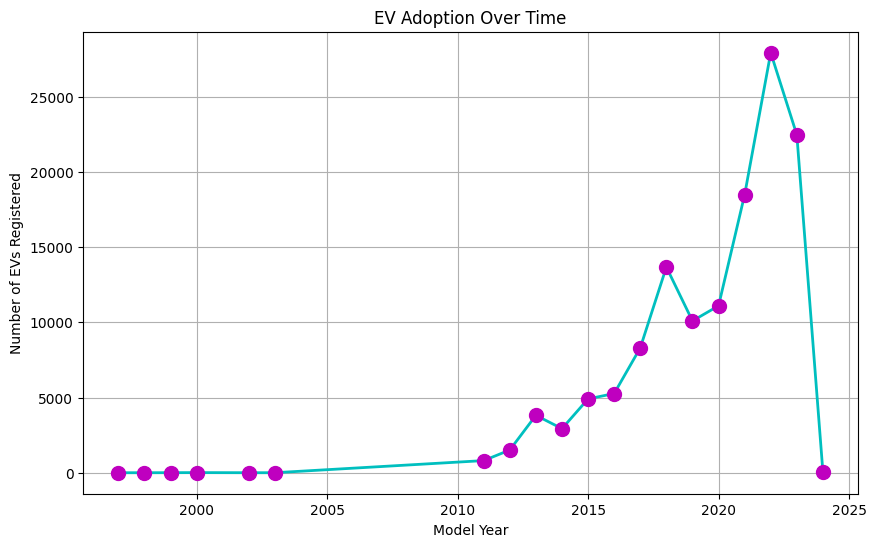

In [40]:
import matplotlib.pyplot as plt

# Ensure plots are rendered inline
%matplotlib inline

yearly_adoption=df_filtered['Model Year'].value_counts().sort_index()

# Visualize the trend
plt.figure(figsize=(10, 6))
yearly_adoption.plot(kind='line', marker='o', color='c', linestyle='-', linewidth=2, markersize=8)  # Customize color and style
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs Registered')
plt.grid(True)

# Adding an additional color for markers
plt.scatter(yearly_adoption.index,yearly_adoption,color='m',s=100,zorder=5)
plt.show()

The line chart illustrates a clear upward trend in EV registrations, especially from 2011 onwards. Early registrations were very low, with just 1 in 1997 and 9 in 2000. Starting in 2011, there was a significant increase, with numbers rising to 807. The growth became more pronounced from 2016, reaching 5.3K and peaking at 13.7K in 2018. The highest point was in 2022 with 27.9K registrations. In 2023, there was a slight decline to 22.5K, though the overall trend remains positive. The 2024 figure of 30 suggests preliminary or incomplete data. Overall, the chart demonstrates a strong growth trajectory in EV adoption over the years.

#### **(ii) Regional Registration Patterns:**   
Examine the geographical distribution of EV registrations to identify which areas have the highest density of electric vehicles. This will highlight regional trends and preferences in EV adoption.

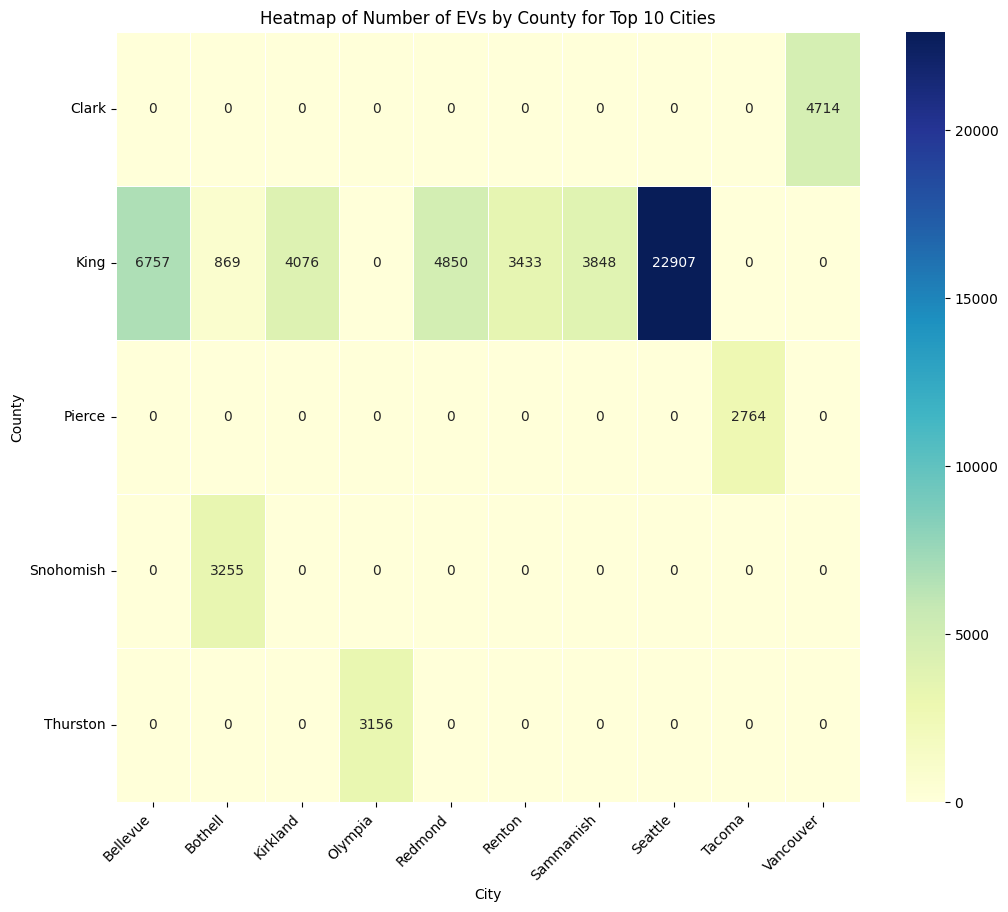

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of EVs by city
city_dist = df_filtered['City'].value_counts()

# Select the top 10 cities
top_10_cities = city_dist.head(10).index

# Filter the DataFrame to include only the top 10 cities
filtered_df = df_filtered[df_filtered['City'].isin(top_10_cities)]

# Create a pivot table for the heatmap
heatmap_data = filtered_df.groupby(['County', 'City']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Number of EVs by County for Top 10 Cities')
plt.xlabel('City')
plt.ylabel('County')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()

The heatmap compares the number of electric vehicles (EVs) registered in various cities within five counties: King, Snohomish, Pierce, Clark, and Thurston. Here are the key findings from the heatmap:

**1.King County Dominance:**

>- **Seattle** has the highest number of EV registrations by a significant margin, far outpacing the other cities listed with 22,907 EVs.

>- **Bellevue** (6,757), **Kirkland** (4,076), and** Redmond** (4,850), also in King County, follow Seattle with the next highest registrations.

>- Other cities within King County, such as Sammamish (3,848) and Olympia (3,433), show moderate EV registrations.

**2.Clark County:**

>- **Vancouver** has a substantial number of EVs (4,714), making it a notable city for EV adoption within Clark County.

**3.Snohomish County:**

>- **Everett** shows a considerable number of EVs (3,255), indicating it as a key area for EVs within Snohomish County.

**4.Pierce County:**

>- **Tacoma** shows a smaller but noticeable count of EVs (2,764), indicating moderate EV adoption.

**5.Thurston County:**

>- **Olympia** has a noteworthy count of EVs (3,156), making it a significant city for EV adoption within Thurston County.

**6.Sparse EV Presence:**

>- Many cities within these counties have either zero or very low counts of EVs, suggesting that EV adoption is not uniformly distributed and is heavily concentrated in certain areas.

**7.Implications for EV Market Analysis:**  

>- The majority of cities shown are from King County, which seems to dominate EV registrations among the counties.
EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

Overall, the heatmap indicates that EV adoption is significantly higher in King County, particularly in Seattle, with other counties like Clark and Snohomish showing significant numbers in specific cities. This distribution highlights the concentration of EV registrations in urban and suburban areas, with rural or less populated areas having lower adoption rates.

#### **(iii) EV Category Breakdown:**   
Analyze the distribution of different types of electric vehicles within the dataset to understand which types are most common. This will provide insights into the market share of each EV category.

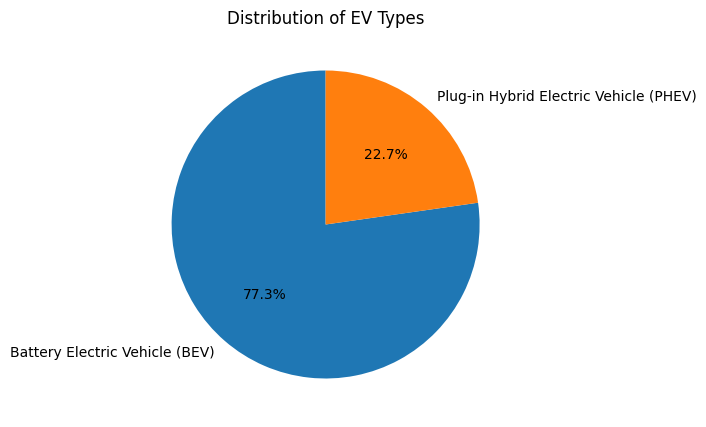

In [42]:
# Count the number of each type of EV
ev_count=df_filtered.groupby(['Electric Vehicle Type']).size()

# Plotting a pie chart 
plt.figure(figsize=(8,5))
plt.pie(ev_count,labels=ev_count.index,autopct='%1.1f%%',startangle=90)
plt.title('Distribution of EV Types')
plt.show()

In the United States, the distribution of electric vehicles reveals a strong preference for Battery Electric Vehicles (BEVs), which constitute 77.3% of the total EVs registered. BEVs, known for their exclusive reliance on electric power, are leading the market, indicating a significant shift towards fully electric transportation. Meanwhile, Plug-in Hybrid Electric Vehicles (PHEVs) represent 22.7% of the EV registrations.PHEVs, which combine electric propulsion with a traditional gasoline engine, remain an important segment, catering to drivers who value the flexibility of dual power sources. This distribution underscores the growing adoption of BEVs while highlighting the continued relevance of PHEVs in the evolving landscape of electric mobility.



#### **(iv) Brand and Model Analysis:**  
Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

So, let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

C:\Users\gkuir\AppData\Local\Temp\ipykernel_10648\881822465.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_count.values,y=brand_count.index, palette='viridis')


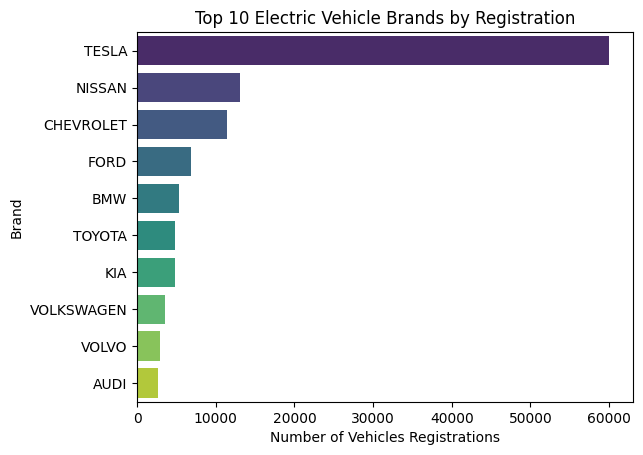

In [43]:
# analyzing the popularity of EV manufacturers
brand_count=df_filtered['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

# Plotting top 10 brands
sns.barplot(x=brand_count.values,y=brand_count.index, palette='viridis')
plt.title('Top 10 Electric Vehicle Brands by Registration')
plt.xlabel('Number of Vehicles Registrations')
plt.ylabel('Brand')
plt.show()

The chart reveals that TESLA dominates the market with the highest number of registered vehicles, far surpassing all other manufacturers. NISSAN ranks second in popularity, with CHEVROLET in third place, though both have notably fewer registrations compared to TESLA. Following these, FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, VOLVO, and AUDI are listed in descending order based on the number of registered vehicles.

**Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:**

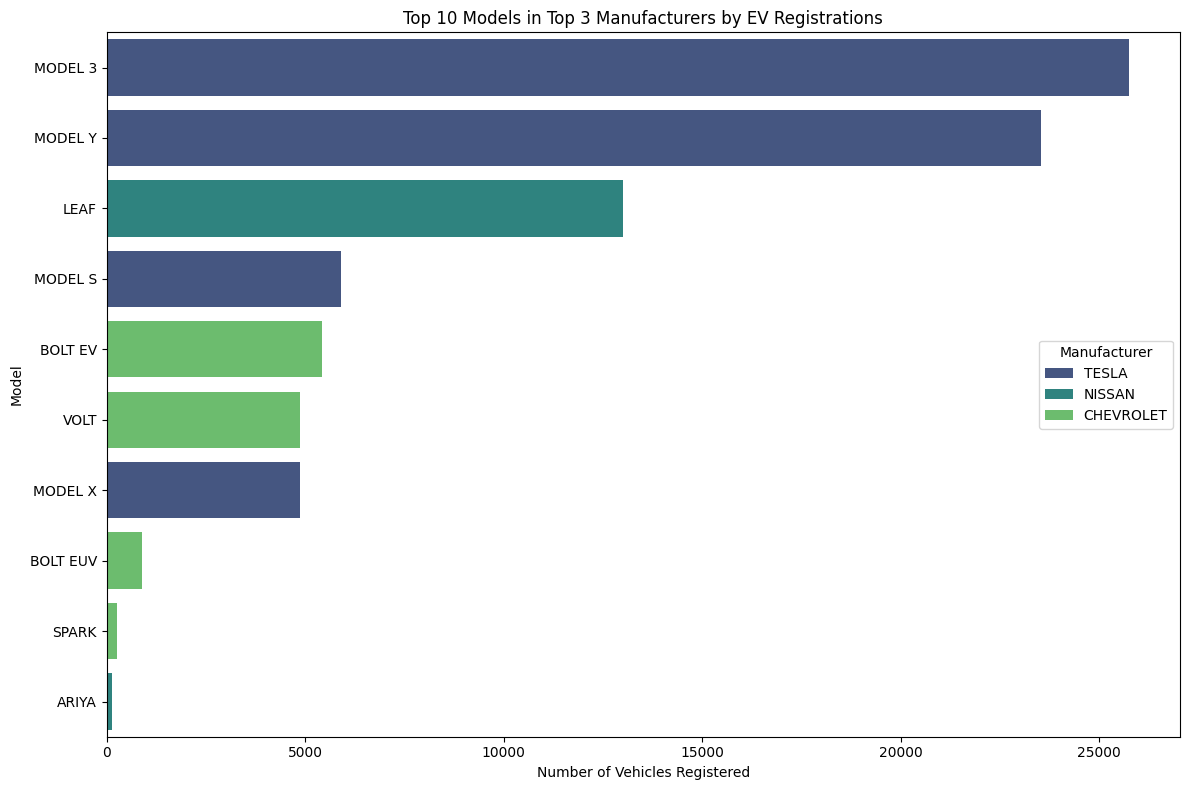

In [45]:
# Selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = brand_count.head(3).index

# Filtering the dataset for these top manufacturers
top_makes_data = df_filtered[df_filtered['Make'].isin(top_3_makes)]

# Analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# Visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top 10 Models in Top 3 Manufacturers by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Manufacturer', loc='center right')
plt.tight_layout()
plt.show()

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: TESLA, NISSAN, and CHEVROLET. Here are the findings:


>- TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.

>- NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.

>- TESLA’s MODEL S and MODEL X also have a significant number of registrations.

>- CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.

>- NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

**(v) Electric Range Trends:**    
Next, we’ll explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years. So, let’s look at the distribution of electric ranges in the dataset and identify any notable trends, such as improvements over time or variations between different vehicle types or manufacturers:



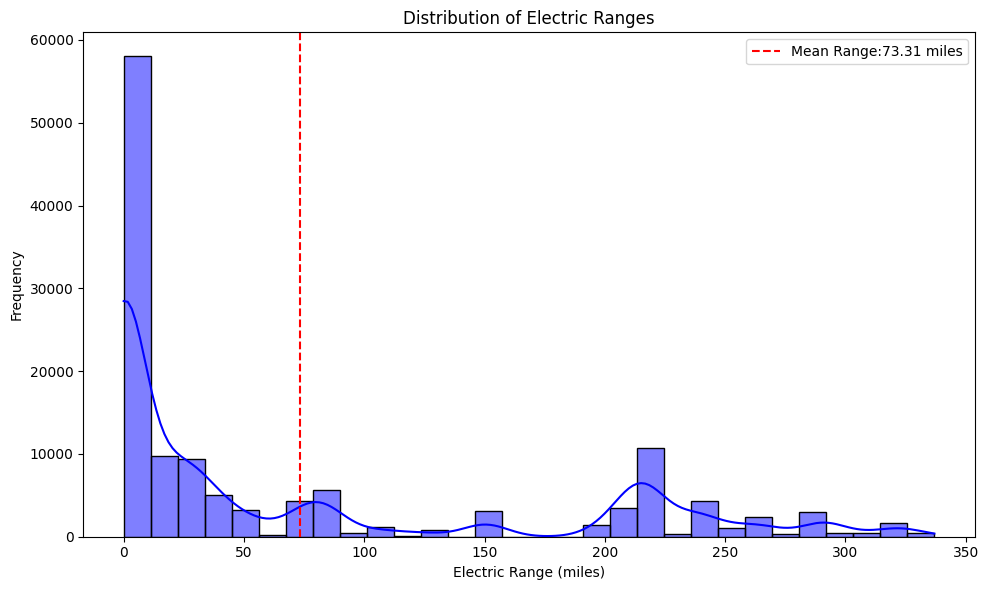

In [46]:
# Plotting the distribution of electric ranges
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Electric Range'],bins=30,kde=True,color='Blue')
plt.title('Distribution of Electric Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.axvline(df_filtered['Electric Range'].mean(),color='red',linestyle='--',label=f'Mean Range:{df_filtered['Electric Range'].mean():.2f} miles')
plt.legend()
plt.tight_layout()
plt.show()

**The above graph shows the mean electric range. Key observations from the graph include:**

>- There is a high frequency of vehicles with a low electric range, peaking just before 50 miles.

>- The distribution is right-skewed, with a long tail extending towards higher ranges, although vehicles with higher ranges are much less frequent.

>- The mean electric range for this set of vehicles is approximately 73.31 miles.

>- Despite the presence of EVs with ranges up to around 350 miles, the majority of vehicles have a range below the mean.

>- The data suggests that while high-range EVs are available, the market is still dominated by vehicles with shorter ranges.

It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.






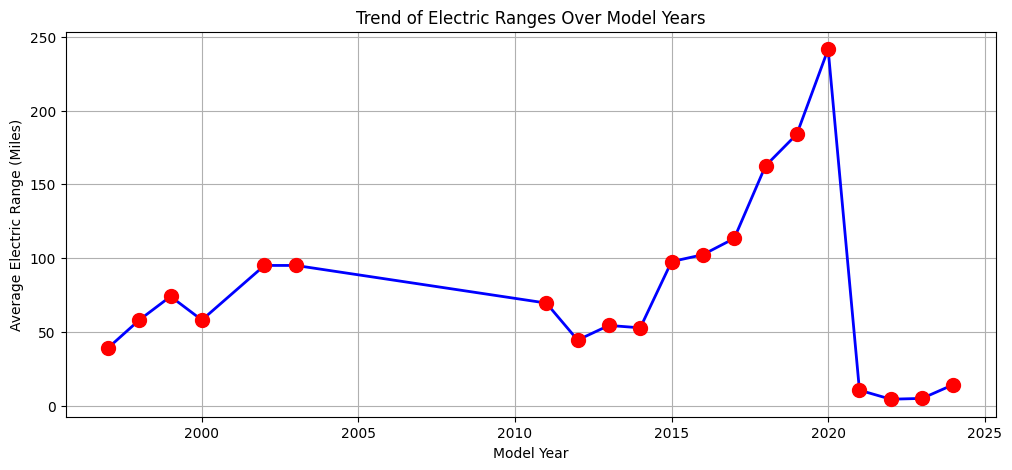

In [59]:
# calculating the average electric range by model year
avg_electric_range=df_filtered.groupby('Model Year')['Electric Range'].mean()

# Visualize the trend of electric ranges over model years
plt.figure(figsize=(12,5))
avg_electric_range.plot(kind='line',marker='o',color='b',linestyle='-',linewidth=2,markersize=8)
plt.title('Trend of Electric Ranges Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (Miles)')
plt.grid(True)

# Adding an additional color for markers
plt.scatter(avg_electric_range.index,avg_electric_range,color='r',s=100,zorder=5)
plt.show()



The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

>- The average electric range of EVs shows a general upward trend from 2000 to 2024, indicating technological advancements.
>- The peak in average range occurs around 2020, representing the highest point in the data.
>- After 2020, there is a sharp decline in the average range, possibly due to incomplete data or the introduction of lower-range models.
>- A slight recovery in the average range is observed in the most recent year.

Despite some fluctuations, the overall trend over the last two decades reflects significant progress in increasing the electric range of EVs.

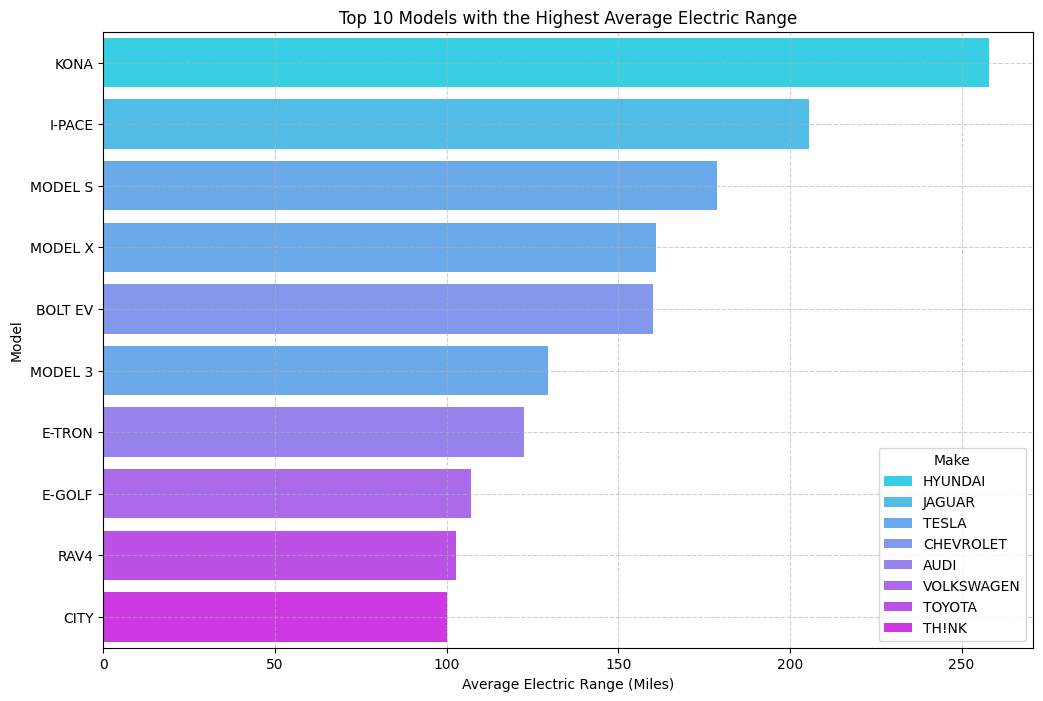

In [79]:
# Group the data by Model and Calculate the average electric range 
model_avg_range=df_filtered.groupby(['Make','Model'])['Electric Range'].mean()

# sort the models by average electric range in descending orders and select the top 10
top_10_models=model_avg_range.sort_values(ascending=False).reset_index().head(10)
top_10_models

# Visualize the top 10 models with a bar chart
plt.figure(figsize=(12,8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_10_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes') 
plt.title('Top 10 Models with the Highest Average Electric Range')
plt.xlabel('Average Electric Range (Miles)')
plt.ylabel('Model')

plt.grid(True,linestyle='--',alpha=0.6)
plt.show()


In this analysis, the top 10 electric vehicle (EV) models with the highest average electric range were identified and visualized. The results reveal significant insights into the EV market:

>- **Hyundai KONA**leads the chart with the highest average electric range, showcasing Hyundai's strong focus on delivering long-range EVs.
>- **Jaguar I-PACE** follows closely, indicating Jaguar's commitment to combining luxury with high-performance electric capabilities.
>- **Tesla** is a major player, with three of its models (Model S, Model X, and Model 3) ranking among the top, reflecting Tesla's industry leadership in producing EVs with extended ranges.
>- **Chevrolet Bolt EV** also makes a strong showing, highlighting its position as a competitive option in the affordable EV market.
>- **Audi E-TRON** and **Volkswagen E-GOLF** represent the German automakers, indicating their strategic push into the electric vehicle space with models offering substantial electric ranges.
>- The presence of **Toyota RAV4** and **TH!NK CITY** in the top 10 underscores the diversity in the market, with different brands offering varied models to meet consumer demands for longer-range electric vehicles.

The bar chart not only underscores the prominence of certain automakers in the EV market but also highlights the strides made in improving the electric range across different models. This visualization effectively communicates how different manufacturers are contributing to the evolution of electric vehicles, with a clear focus on enhancing battery technology and range capabilities.

### **Estimated Market Size Analysis of Electric Vehicles in the United States**

Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:

In [81]:
df_filtered.head(2)

VIN (1-10)    County      City State Postal Code  Model Year    Make  \
0  5YJ3E1EA0K  Thurston  Tumwater    WA     98512.0        2019   TESLA   
1  1N4BZ1DV4N    Island   Clinton    WA     98236.0        2022  NISSAN   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0        0.0                  22.0       242565116   
1        0.0                  10.0       183272785   

                                Vehicle Location        Electric Utility  \
0  POINT (-122.91310169999997 47.01359260000004)  PUGET SOUND ENERGY INC   
1  POINT (-122.35936399999997 47.97965520000008)  PUGET SOUND ENERGY INC   

   2020 Census Tract  
0       5.306701e+10  
1       5.302997e+10

In [106]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        4
2000        9
2002        2
2003        1
2008       20
2010       23
2011      815
2012     1657
2013     4598
2014     3601
2015     4925
2016     5688
2017     8579
2018    14343
2019    10577
2020    11151
2021    18554
2022    27983
2023    22476
2024       30
Name: count, dtype: int64

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [112]:

filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# Prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()  # Normalize years
y_data = filtered_years.values

# Fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# Use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()  # Normalize forecast years
forecasted_values = exp_growth(forecast_years, *params)

# Create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)


{2024: 3790.677278896711, 2025: 4169.072291757301, 2026: 4585.239653784859, 2027: 5042.949896601362, 2028: 5546.349935851125, 2029: 6100.000642807789}


Now, let’s plot the estimated market size data:

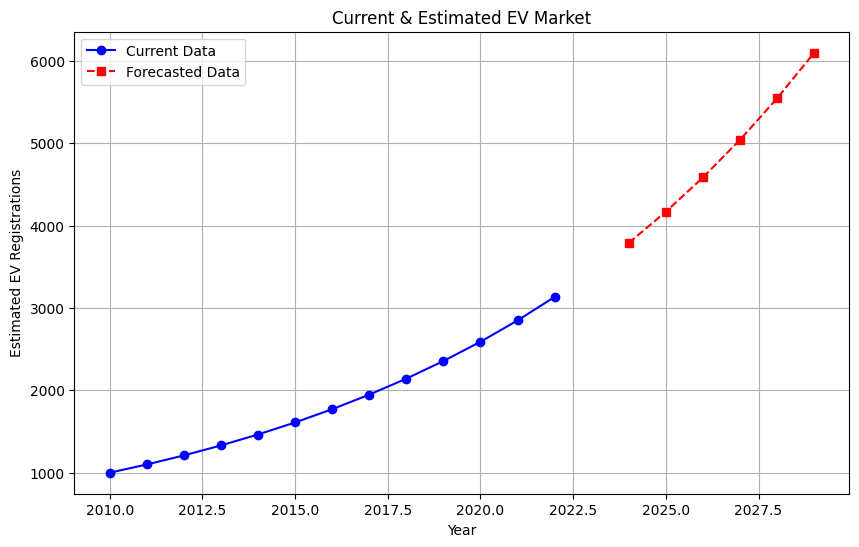

In [113]:
# Combine current and forecasted data
all_years = np.concatenate([filtered_years.index, forecast_years + filtered_years.index.min()])
all_values = np.concatenate([filtered_years.values, forecasted_values])

# Create DataFrame for visualization
market_df = pd.DataFrame({
    'Year': all_years,
    'Estimated EV Registrations': all_values
})

# Plot current and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(filtered_years.index, filtered_years.values, 'o-', label='Current Data', color='blue')
plt.plot(forecast_years + filtered_years.index.min(), forecasted_values, 's--', label='Forecasted Data', color='red')
plt.xlabel('Year')
plt.ylabel('Estimated EV Registrations')
plt.title('Current & Estimated EV Market')
plt.legend()
plt.grid(True)
plt.show()

From the above graph, we can see:  

>- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.  

>- The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

Given the rising trend in EV registrations and the exciting forecast data, it's clear that the EV market is set to grow significantly. The dramatic increase in predicted registrations shows that more and more people are embracing electric vehicles, and this trend is expected to continue. Overall, the data suggest a bright future for the EV industry, with a major shift in consumer preferences and a wealth of new investment and business opportunities on the horizon.

### **Summary**
Market size analysis plays a vital role in market research by estimating the potential sales volume within a specific market. It allows businesses to gauge demand, evaluate market saturation, and pinpoint growth opportunities. Our analysis of the electric vehicle market reveals a bright future, marked by a significant shift in consumer preferences and the potential for increased investment and business prospects.

I hope you found this article on Electric Vehicles market size analysis using Python insightful. 